In [1]:
import os
import sys
import scanpy as sc
import matplotlib.pyplot as plt

module_path = os.path.abspath('/mnt/c/Users/demeter_turos/PycharmProjects/chrysalis')
if module_path not in sys.path:
    sys.path.append(module_path)

import chrysalis as ch


In [2]:
# Mouse brain FFPE
# calculate SVGs and save h5
sample_path = '/mnt/c/Users/demeter_turos/PycharmProjects/chrysalis/data/Visium_FFPE_Mouse_Brain/'
adata = sc.read_visium(sample_path)

sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pp.filter_cells(adata, min_counts=3000)
sc.pp.filter_genes(adata, min_cells=10)

ch.detect_svgs(adata, min_morans=0.05, min_spots=0.05)
adata.write('/mnt/c/Users/demeter_turos/PycharmProjects/chrysalis/article/IV_mouse_brain/data/' + 'chr.h5ad')


Calculating SVGs: 100%|██████████| 12079/12079 [01:28<00:00, 136.16it/s]


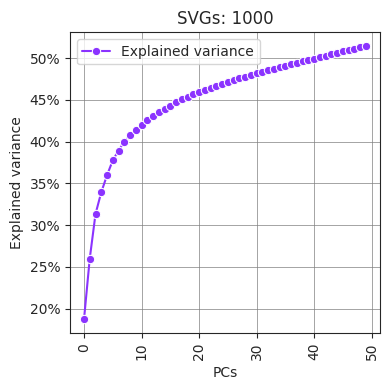

In [3]:
data_path = '/mnt/c/Users/demeter_turos/PycharmProjects/chrysalis/article/IV_mouse_brain/data/'
adata = sc.read_h5ad(data_path + 'chr.h5ad')
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

ch.pca(adata, n_pcs=50)

ch.plot_explained_variance(adata)
plt.show()

ch.aa(adata, n_pcs=20, n_archetypes=28)
adata.write_h5ad(data_path + 'chr_28.h5ad')


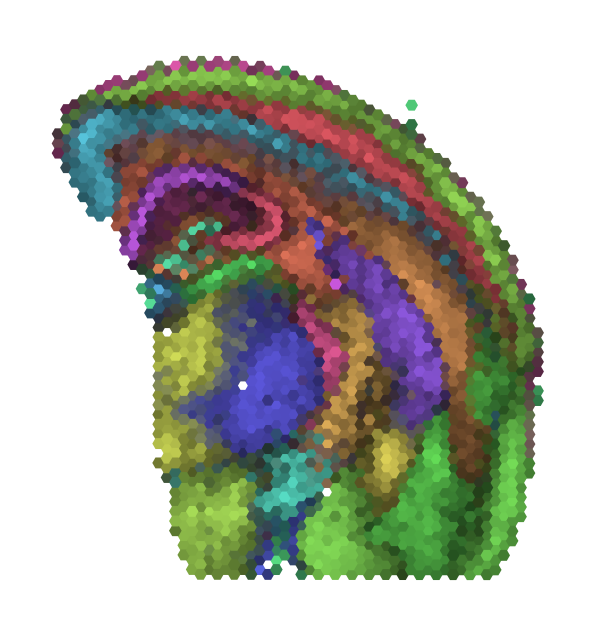

In [4]:
data_path = '/mnt/c/Users/demeter_turos/PycharmProjects/chrysalis/article/IV_mouse_brain/data/'

adata = sc.read_h5ad(data_path + 'chr_28.h5ad')

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.axis('off')
adata.obs['sample'] = 'Visium_FFPE_Mouse_Brain'
ch.plot(adata, dim=28, rotation=90, ax=ax, sample_id='Visium_FFPE_Mouse_Brain', spot_size=2, seed=69)
plt.show()


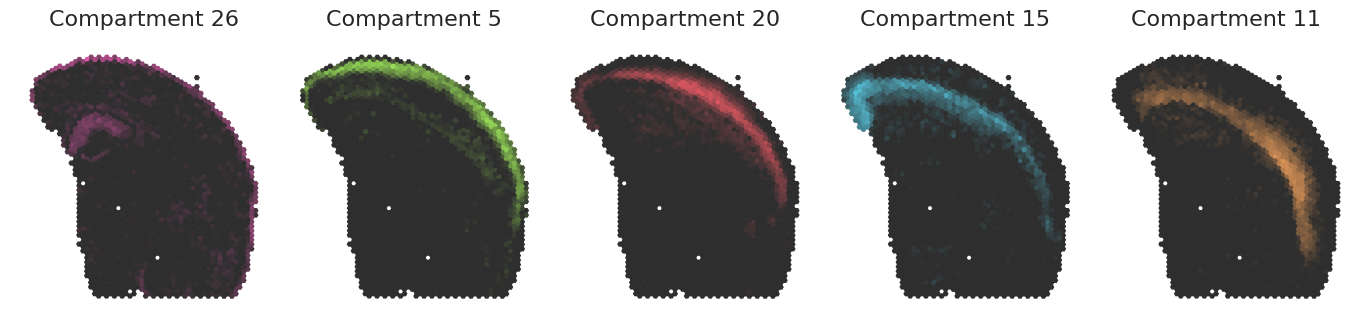

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(15, 4))
axs = axs.flatten()
for a in axs:
    a.axis('off')
for i, dim in enumerate([26, 5, 20, 15, 11]):
    ch.plot_compartment(adata, fig, axs[i], dim=28, selected_dim=dim, color_first='#2e2e2e', spot_size=2.05, rasterized=True, sample_id='Visium_FFPE_Mouse_Brain', rotation=90, seed=69)
    axs[i].set_title(f'Compartment {dim}', size=16)
plt.subplots_adjust(hspace=0.05, wspace=0.01, left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()


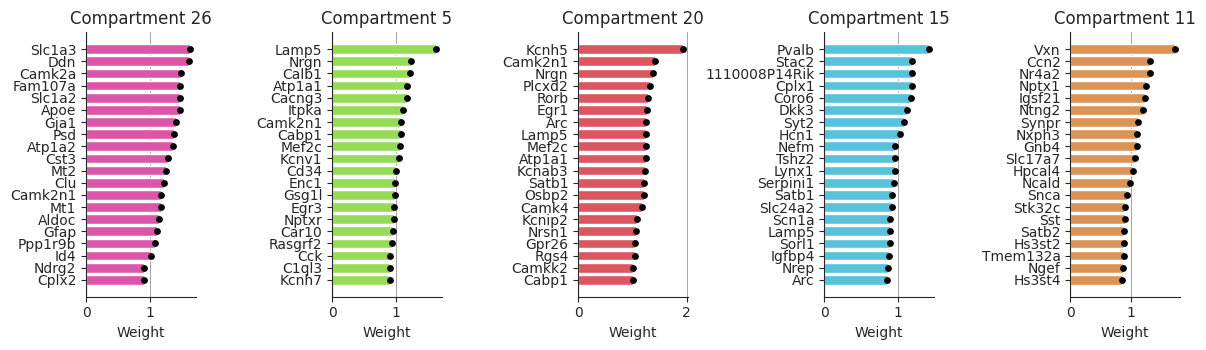

In [6]:
ch.plot_weights(adata, compartments=[26, 5, 20, 15, 11], ncols=5, w=0.8, h=0.9, seed=69)
plt.show()
